# function

In [1]:
def load_dict(filepath: str) -> list:
    dict = []
    with open(filepath, "r", encoding="utf-8") as f:
        for line in f:
            word = line.strip()
            if word:
                dict.append(word)
    return dict

posemo = load_dict("dict_posemo.txt")
negemo = load_dict("dict_negemo.txt")

print(f"Loaded {len(posemo)} words")
print(posemo[:20])

print(f"Loaded {len(posemo)} positive words, {len(negemo)} negative words")


Loaded 620 words
['accept', 'accepta*', 'accepted', 'accepting', 'accepts', 'active', 'actively', 'admir*', 'ador*', 'advantag*', 'adventur*', 'affection*', 'agree', 'agreeable', 'agreeableness', 'agreeably', 'agreed', 'agreeing', 'agreement*', 'agrees']
Loaded 620 positive words, 744 negative words


In [2]:

def analyze_text(text: str, posemo: list, negemo: list):
    import re
    words = re.findall(r'\b\w+\b', text.lower())
    total = len(words)
    pos_count = sum(1 for w in words if w in posemo)
    neg_count = sum(1 for w in words if w in negemo)
    pos_pct = (pos_count / total * 100) if total else 0
    neg_pct = (neg_count / total * 100) if total else 0
    print(f"Total words: {total}")
    print(f"Positive words: {pos_count} ({pos_pct:.2f}%)")
    print(f"Negative words: {neg_count} ({neg_pct:.2f}%)")

# 範例輸入
text = "I love you. I hate u"
analyze_text(text, posemo, negemo)

Total words: 6
Positive words: 1 (16.67%)
Negative words: 1 (16.67%)


In [3]:
# 擴充功能
iwords = ["i", "me", "my"]

# 以下維度字典檔案目前未提供，如需使用請自行準備檔案並取消註解
# social = load_dict("dict_social.txt")
# cogproc = load_dict("dict_cogproc.txt")
# allure = load_dict("dict_allure.txt")
# moral = load_dict("dict_moral.txt")

def clean_text(text: str) -> str:
    """
    清理文字，處理特殊字符（如彎引號、連字號等）
    """
    text = text.replace("’", "'").replace("–", " ").replace("—", " ").replace("-", " ")
    return text

def analyze_text_adv(text: str, posemo, negemo, iwords):
    import re
    text = clean_text(text)  # 清理文字
    words = re.findall(r'\b[a-zA-Z]+\b', text.lower())  # 排除數字、URL、emoji等
    total = len(words)
    def pct(count): return (count / total * 100) if total else 0

    def match_dict(word, dictionary):
        """
        支援字尾萬用字（*）匹配
        """
        return any(word.startswith(entry.rstrip('*')) for entry in dictionary)

    stats = {
        "I-words (I, me, my)": sum(1 for w in words if w in iwords),
        "Positive Tone": sum(1 for w in words if match_dict(w, posemo)),
        "Negative Tone": sum(1 for w in words if match_dict(w, negemo)),
        # "Social Words": sum(1 for w in words if match_dict(w, social)),
        # "Cognitive Processes": sum(1 for w in words if match_dict(w, cogproc)),
        # "Allure": sum(1 for w in words if match_dict(w, allure)),
        # "Moralization": sum(1 for w in words if match_dict(w, moral)),
    }

    print(f"{'Traditional LIWC Dimension':<25}{'Your Text (%)':<15}")
    for k, v in stats.items():
        print(f"{k:<25}{pct(v):<15.2f}")

# 範例輸入
text = "I love you. I hate u"
analyze_text_adv(text, posemo, negemo, iwords)

Traditional LIWC DimensionYour Text (%)  
I-words (I, me, my)      33.33          
Positive Tone            33.33          
Negative Tone            16.67          


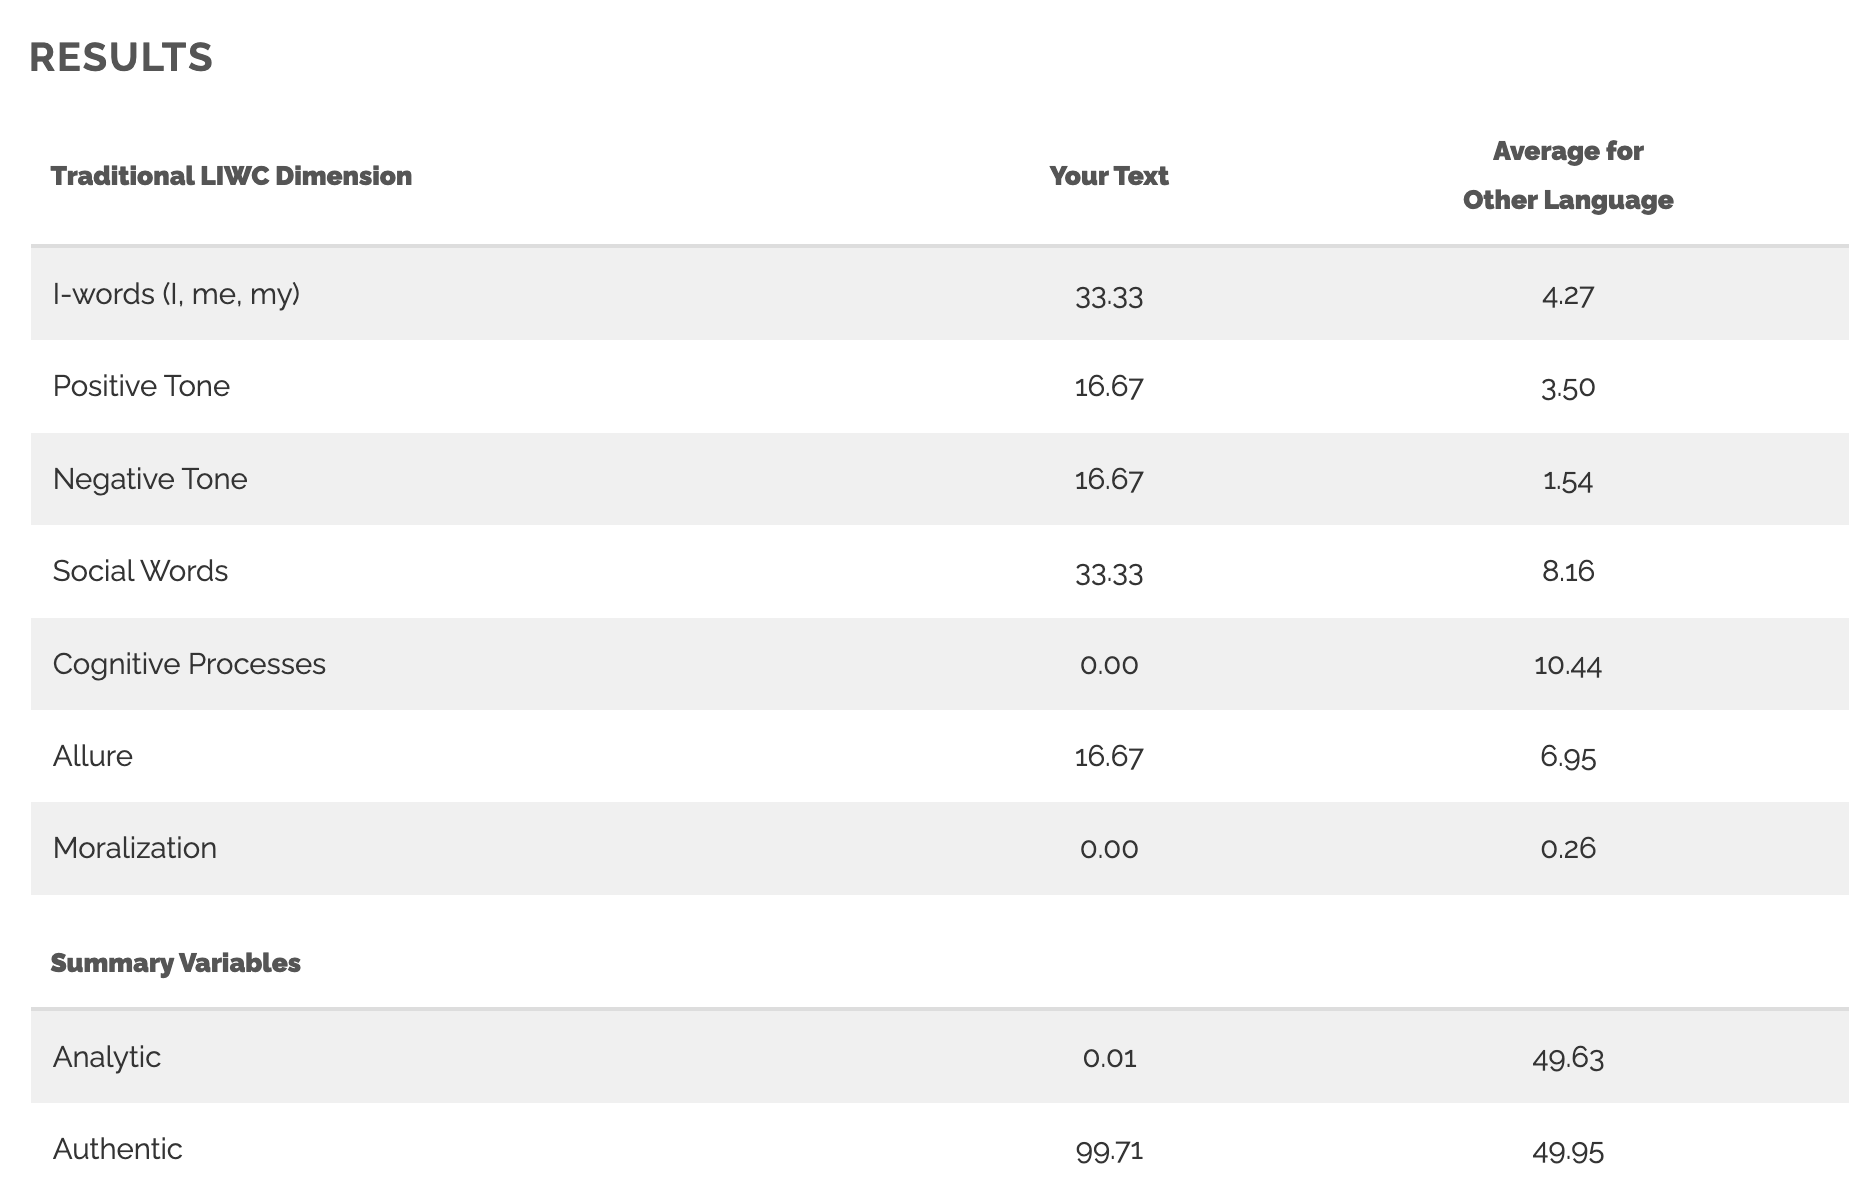

# Eaxmple 

In [68]:
from pathlib import Path

def analyze_file(filepath_str, posemo, negemo, iwords):
    """
    讀取指定檔案並分析文字內容
    :param filepath_str: 檔案路徑（字串）
    :param posemo: 正向情緒字典
    :param negemo: 負向情緒字典
    :param iwords: I-words 字典
    """
    filepath = Path(filepath_str)
    if filepath.exists():
        with filepath.open("r", encoding="utf-8") as f:
            text = f.read()
        analyze_text_adv(text, posemo, negemo, iwords)
    else:
        print(f"檔案不存在：{filepath}")

# 使用範例


In [69]:
analyze_file('test/test1.txt', posemo, negemo, iwords)
#跟網站的結果有差異，應該是因為2015年的字典 liwc 應該有更新字典

Traditional LIWC DimensionYour Text (%)  
I-words (I, me, my)      0.00           
Positive Tone            13.53          
Negative Tone            5.29           


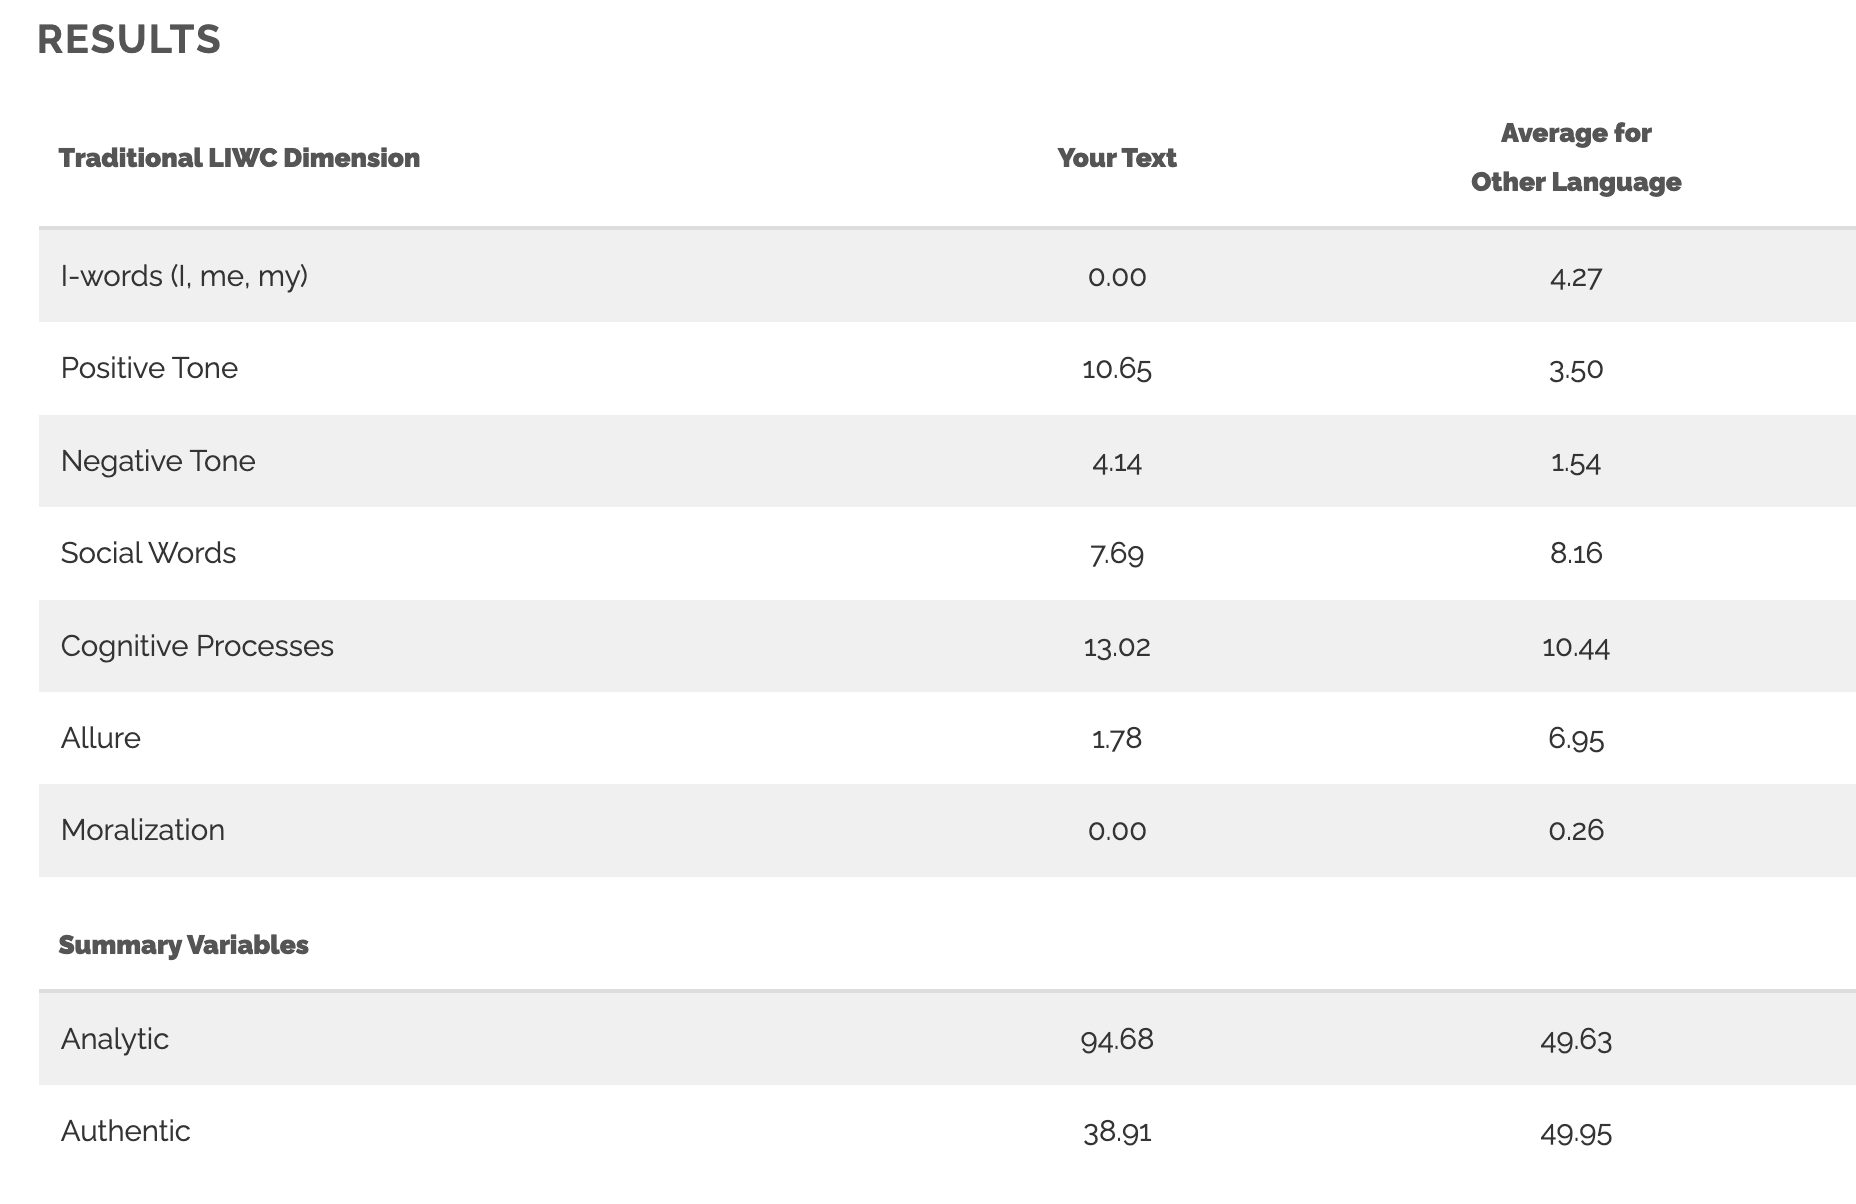

In [62]:
analyze_file('test/test2.txt', posemo, negemo, iwords)

Traditional LIWC DimensionYour Text (%)  
I-words (I, me, my)      0.00           
Positive Tone            25.38          
Negative Tone            5.58           


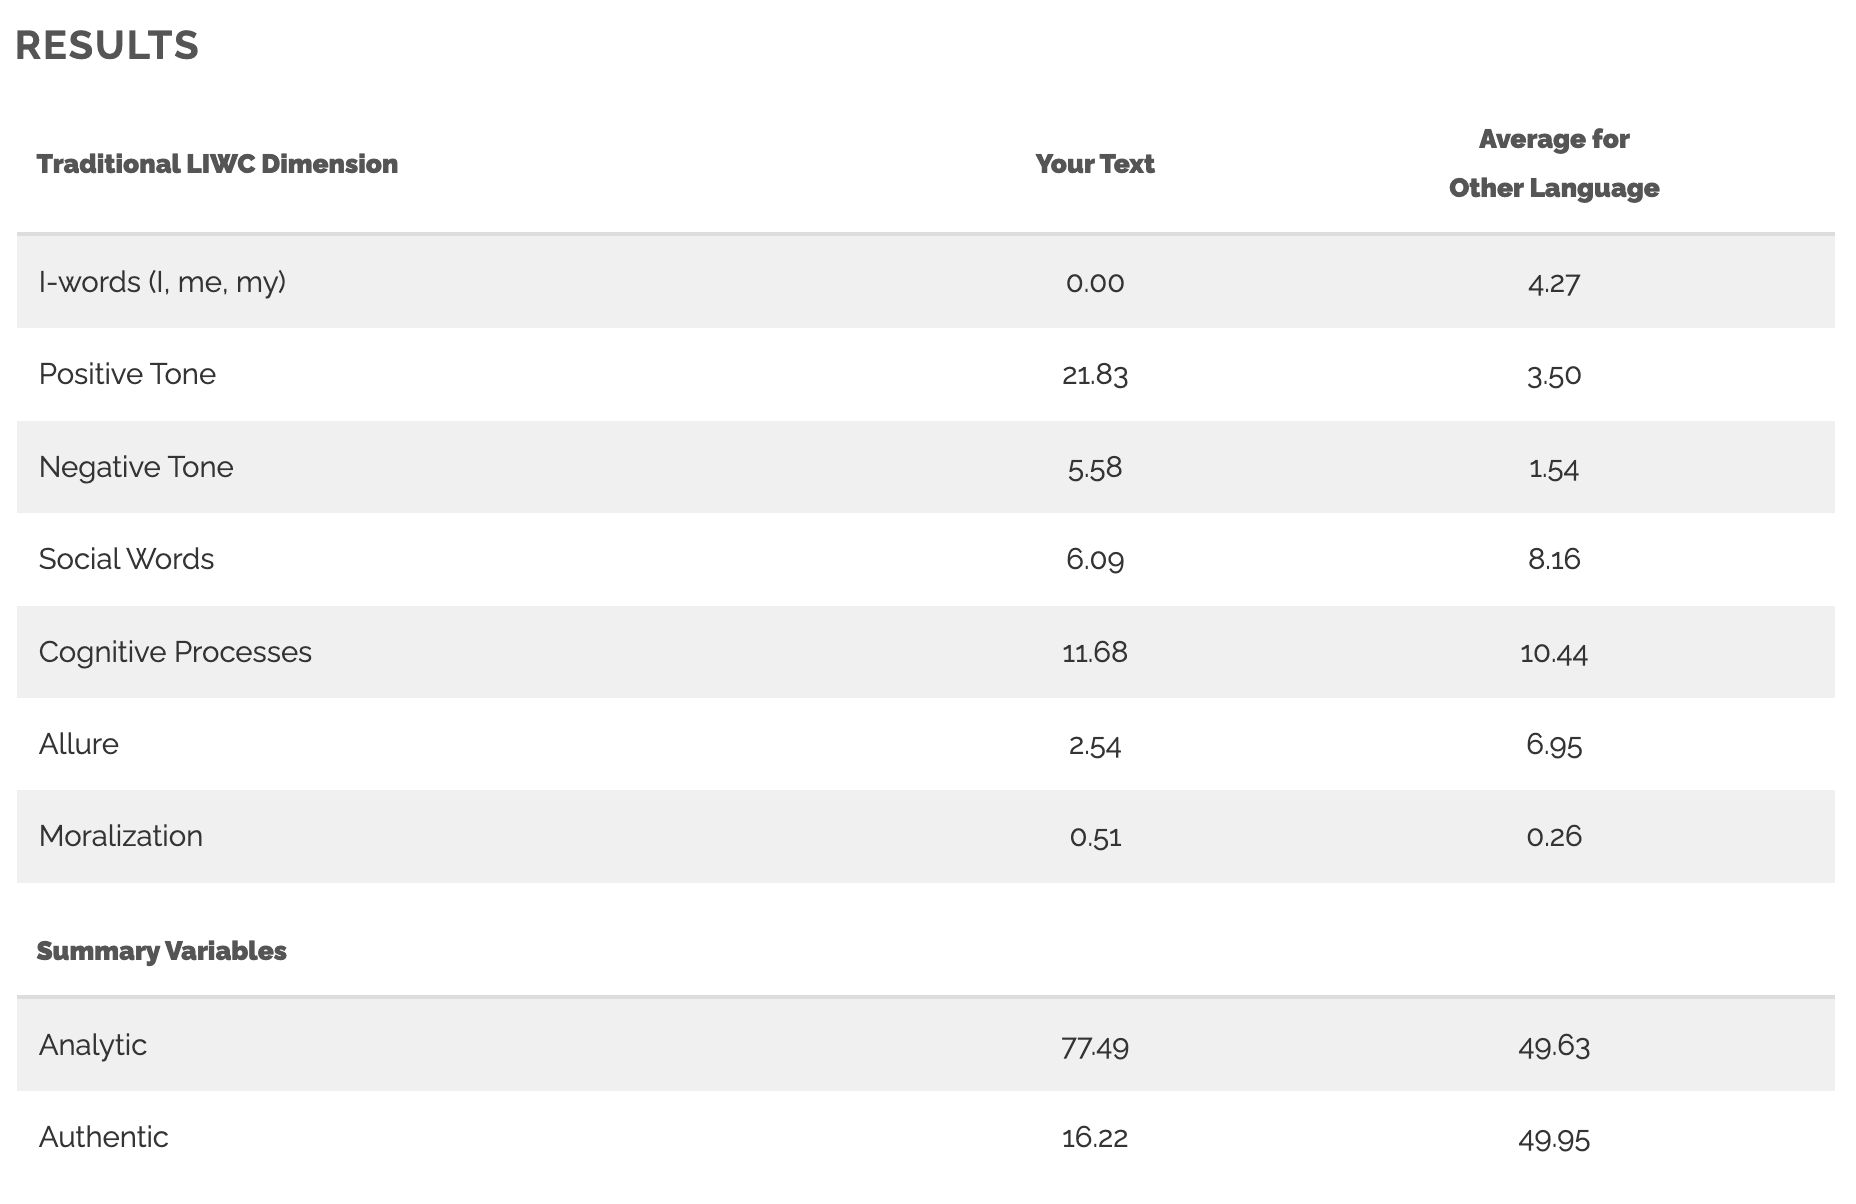

Formula: Error (%) = |Result - LIWC Website Result| / LIWC Website Result * 100

1. Test 1:

- Positive Tone Error (%): = |13.53 - 10.65| / 10.65 * 100 = 2.88 / 10.65 * 100 ≈ 27.04%
- Negative Tone Error (%): = |5.29 - 4.14| / 4.14 * 100 = 1.15 / 4.14 * 100 ≈ 27.78%
2. Test 2:

- Positive Tone Error (%): = |25.38 - 21.83| / 21.83 * 100 = 3.55 / 21.83 * 100 ≈ 16.26%
- Negative Tone Error (%): = |5.58 - 5.58| / 5.58 * 100 = 0.00 / 5.58 * 100 = 0.00%

### Why do the results differ from the official LIWC website?

Although this project code attempts to simulate the LIWC analysis process, discrepancies may still occur due to the following reasons:

1.  **Dictionary Version Differences**
    *   This project utilizes the open LIWC 2015 dictionary, whereas the official website may be using a newer version (e.g., LIWC 2022). Differences in vocabulary content can inevitably lead to some emotional words not being matched.

2.  **Tokenization Nuances**
    *   While we have normalized smart quotes, hyphens, and punctuation, the official LIWC website likely employs a more advanced tokenization algorithm (handling compound words, special abbreviations, Unicode support, etc.). This project relies on regular expressions, which may result in minor differences in detail.

3.  **Wildcard Matching Logic**
    *   This program only supports suffix wildcards (`*`) using prefix matching. If the official dictionary design or matching algorithm differs, some words might not be correctly identified.

4.  **Denominator Definition (Word Count)**
    *   Our calculation uses the count of "visible English word tokens" as the denominator. If the official calculation includes or excludes other token types (such as numbers, symbols, or compound words) differently, the resulting percentage will vary.

5.  **Preprocessing Variations**
    *   The official website may implement additional preprocessing steps (such as stopword removal, special case handling, or contextual analysis), whereas this project performs only basic text cleaning.